## Хэширование

**Хэширование** - это процесс преобразования данных произвольной длины в строку фиксированной длины, называемую хешем. Для этого используется специальный алгоритм - хеш-функция. На вход хеш-функции могут подаваться любые данные (текст, файл, пароль и т.д.), а на выходе всегда получается строка (или число) фиксированной длины, например, 128 или 256 бит.

**Основные свойства хеш-функций:**
- **Детерминированность:** одинаковые входные данные всегда дают одинаковый хеш.
- **Быстрота вычисления:** хеш должен вычисляться быстро для любых данных.
- **Лавинообразность:** в базе данных хранится не пароль, а хэш-функция
- **Сложность обратного преобразования:** по хешу невозможно восстановить исходные данные (особенно важно для криптографических функций).
- **Устойчивость к коллизиям:** вероятность того, что два разных набора данных дадут одинаковый хеш, должна быть минимальной.

**Применения хеширования:**
- Хранение паролей
- Проверка целостности данных
- Быстрый поиск в структурах данных (например, в хеш-таблицах)
- Цифровые подписи и блокчейн

## Хеш-таблицы

**Хеш-таблица** - это структура данных, предназначенная для эффективного хранения и поиска данных по ключу. Она реализует интерфейс ассоциативного массива: позволяет хранить пары «ключ-значение» и выполнять три основные операции - добавление, поиск и удаление по ключу.

### Как работает хеш-таблица

- **Хеш-функция** преобразует ключ в индекс массива, где будет храниться соответствующее значение.
- Вся таблица - это массив, элементы которого содержат пары «ключ-значение».
- При поиске по ключу хеш-функция снова вычисляет индекс, и доступ к значению происходит очень быстро - обычно за время O(1).

### Пример работы хеш-функции

```python
def simple_hash(key, size):
    return sum(ord(char) for char in key) % size

print(simple_hash("Python", 10))  # Например, результат: 6
```
В этом примере строка "Python" преобразуется в индекс 6 для массива размером 10[8].


### Преимущества и недостатки хеш-таблиц

**Преимущества:**
- Быстрый доступ к данным (обычно O(1) для вставки, поиска и удаления)[4][7][8].
- Гибкость в выборе ключей (можно использовать строки, числа и другие неизменяемые типы)[4].

**Недостатки:**
- Возможные коллизии, требующие дополнительных алгоритмов разрешения[3][4].
- Нет гарантированной упорядоченности элементов[4].
- Может потребляться много памяти при низком коэффициенте загрузки[4].

---

**Пример использования хеш-таблицы в Python:**

```python
# Встроенный тип данных dict - это хеш-таблица
d = {}
d["apple"] = 5
print(d["apple"])  # 5
```

**Вывод:**  
Хеширование - это универсальный инструмент для преобразования данных и обеспечения их безопасности, а хеш-таблицы - одна из самых эффективных структур данных для быстрого поиска, вставки и удаления по ключу[1][3][4][7][8].

Алгоритм Рабина-Карпа - это метод поиска подстроки в тексте с использованием хеширования, разработанный в 1987 году. Он эффективен для поиска множества шаблонов одинаковой длины и работает за среднее время O(n + m), где n - длина текста, m - длина шаблона[1][4].

### Основные этапы алгоритма
1. **Вычисление хеша шаблона** с использованием полиномиальной хеш-функции.
2. **Последовательный расчёт хешей** для всех подстрок текста той же длины, что и шаблон.
3. **Сравнение хешей**: при совпадении значений выполняется побитовая проверка подстроки для исключения коллизий[1][2].

**Полиномиальный хэш** - строчка ---> число

Есть строка $s = s_1s_2s_3...s_k$
$$h(s) = (\sum_{i=1}^k{f(s_i)}a)mod\:b$$
$$f(s) = ord(s_i) - ord('a') + 1$$

- $f(s) \neq 0$
- можно использовать схему Горнера
- $mod\:b$ даёт ограниченность

**Поиск вхождений подстроки g в строке s**
- $h = hash(s[i:i+p])$
- нужно посчитать $h = hash(s[i+1:i+p+1])$
  $$hash(s[i+1:i+p+1]) = (\sum_{j=i+1}^{i+p+1} f(s_j)a^{i+p+1-j})mod\:b = hash(s[i:i+p])*a + f(s[i+p+1]) - f(s[i])(a^pmod\:b)$$

**Ключевые особенности**:
- Использует "скользящее хеширование" для эффективного пересчёта хеша при смещении окна за O(1)
- Вероятность коллизий минимизируется выбором большого простого числа q
- В худшем случае (частые коллизии) сложность достигает O(nm)[1][5]

### Пример кода на Python
```python
def rabin_karp(text, pattern, d=256, q=101):
    n = len(text)
    m = len(pattern)
    h = pow(d, m-1, q)
    p = 0  # Хеш шаблона
    t = 0  # Хеш текущей подстроки
    result = []

    # Предварительный расчёт хешей
    for i in range(m):
        p = (d * p + ord(pattern[i])) % q
        t = (d * t + ord(text[i])) % q

    # Основной цикл поиска
    for s in range(n - m + 1):
        if p == t:
            # Проверка на коллизию
            if text[s:s+m] == pattern:
                result.append(s)
        if s = 0 else t + q
    
    return result

# Пример использования
print(rabin_karp("abracadabra", "abra"))  # Вывод: [0, 7]
```

**Пояснение параметров**:
- `d` - размер алфавита (256 для ASCII)
- `q` - простое число для модуля (должно быть больше d)
- `h` - множитель для старшего разряда в полиномиальном хеше

### Оптимизация и применение
- **Поиск множества шаблонов**: хеши всех искомых строк хранятся в хеш-таблице, что позволяет находить любую из k строк за O(n + k)[1][5]
- **Определение плагиата**: алгоритм эффективно находит повторяющиеся фрагменты текста, игнорируя незначительные различия[2][4]
- **Фильтрация данных**: используется в системах обнаружения вторжений и антивирусном ПО

Главное преимущество алгоритма - возможность эффективного поиска множества шаблонов за линейное время, что делает его незаменимым в задачах анализа больших текстовых данных.

## Открытая и закрытая хеш-таблицы - кратко

### Открытая хеш-таблица (цепочки)
- В каждой ячейке массива хранится связанный список элементов с одинаковым хешем.
- Коллизии решаются добавлением в список.
- Удаление и вставка просты.
- Память нужна дополнительно на списки.
- Хорошо работает при высокой загрузке.

### Закрытая хеш-таблица (открытая адресация)
- Все элементы хранятся в массиве.
- При коллизии ищется следующая свободная ячейка (линейное, квадратичное пробирование или двойное хеширование).
- Удаление сложно: нельзя просто очистить ячейку, нужен маркер "удалённый" (tombstone).
- Требует низкого коэффициента загрузки.
- Быстрая при небольшой загрузке, но сложнее реализовать удаление.

---

### Проблема удаления в закрытой хеш-таблице
Просто удалить элемент нельзя - это нарушит поиск других элементов. Используется специальный маркер tombstone, который позволяет продолжать поиск, но требует периодического перехеширования для очистки "мертвых" ячеек.

---

### Перехеширование
- Создание новой таблицы большего размера.
- Перенос всех элементов с пересчётом хешей.
- Делается при высокой загрузке или для очистки tombstone.

---

### Примеры кода

**Открытая хеш-таблица (цепочки):**
```python
class OpenHashTable:
    def __init__(self, size=10):
        self.table = [[] for _ in range(size)]

    def _hash(self, key):
        return hash(key) % len(self.table)

    def insert(self, key, value):
        idx = self._hash(key)
        for i, (k, _) in enumerate(self.table[idx]):
            if k == key:
                self.table[idx][i] = (key, value)
                return
        self.table[idx].append((key, value))

    def search(self, key):
        idx = self._hash(key)
        for k, v in self.table[idx]:
            if k == key:
                return v
        return None

    def delete(self, key):
        idx = self._hash(key)
        for i, (k, _) in enumerate(self.table[idx]):
            if k == key:
                del self.table[idx][i]
                return True
        return False
```

**Закрытая хеш-таблица (открытая адресация с tombstone):**
```python
class ClosedHashTable:
    def __init__(self, size=11):
        self.table = [None] * size
        self.tombstone = object()

    def _hash(self, key):
        return hash(key) % len(self.table)

    def insert(self, key, value):
        idx = self._hash(key)
        while self.table[idx] not in (None, self.tombstone):
            if self.table[idx][0] == key:
                self.table[idx] = (key, value)
                return
            idx = (idx + 1) % len(self.table)
        self.table[idx] = (key, value)

    def search(self, key):
        idx = self._hash(key)
        start = idx
        while self.table[idx] is not None:
            if self.table[idx] != self.tombstone and self.table[idx][0] == key:
                return self.table[idx][1]
            idx = (idx + 1) % len(self.table)
            if idx == start:
                break
        return None

    def delete(self, key):
        idx = self._hash(key)
        start = idx
        while self.table[idx] is not None:
            if self.table[idx] != self.tombstone and self.table[idx][0] == key:
                self.table[idx] = self.tombstone
                return True
            idx = (idx + 1) % len(self.table)
            if idx == start:
                break
        return False
```


Если нужна высокая производительность при большой нагрузке - лучше открытая хеш-таблица. Если важна экономия памяти - закрытая, но с аккуратным управлением удалениями.

---

В Python словари (`dict`) и множества (`set`) - это встроенные коллекции, основанные на хеш-таблицах, обеспечивающие быстрый доступ к данным.

## Словари (dict)

- Хранят пары «ключ: значение».
- Ключи должны быть неизменяемыми типами (строки, числа, кортежи).
- Позволяют быстро получать, добавлять и изменять значения по ключу.
- Используются для ассоциативного хранения данных.

### Пример словаря и базовых операций

```python
# Создание словаря
person = {"name": "Иван", "age": 30, "city": "Москва"}

# Доступ к значению по ключу
print(person["name"])  # Иван

# Добавление или изменение значения
person["age"] = 31

# Проверка наличия ключа
if "city" in person:
    print("Город есть в словаре")

# Перебор ключей и значений
for key, value in person.items():
    print(f"{key}: {value}")
```

## Множества (set)

- Коллекция уникальных элементов без порядка.
- Элементы множества должны быть неизменяемыми.
- Позволяют выполнять операции теории множеств: объединение, пересечение, разность и симметрическую разность.
- Создаются с помощью фигурных скобок `{}` или функции `set()` (для пустого множества обязательно `set()`, так как `{}` - пустой словарь).

### Пример создания и операций с множествами

```python
# Создание множества
vowels = {"а", "е", "ё", "и", "о", "у", "ы", "э", "ю", "я"}

# Создание множества из строки (уникальные буквы)
letters = set("коллекция")

# Пересечение множеств (гласные в слове)
print(letters & vowels)  # {'о', 'я', 'и', 'е'}

# Объединение
a = {1, 2, 3}
b = {3, 4, 5}
print(a | b)  # {1, 2, 3, 4, 5}

# Разность
print(a - b)  # {1, 2}

# Симметрическая разность
print(a ^ b)  # {1, 2, 4, 5}

# Добавление и удаление элементов
letters.add("ы")
letters.remove("к")
print(letters)
```

---

## Итог

| Коллекция | Особенности                          | Пример создания           |
|-----------|------------------------------------|--------------------------|
| dict      | Ключ-значение, ключи уникальны     | `{"key": "value"}`       |
| set       | Уникальные элементы, без порядка    | `{"a", "b", "c"}` или `set()` |

---


## Связные списки в Python: односвязный, двусвязный, кольцевой

### 1. Односвязный список (Singly Linked List)

Каждый узел содержит данные и ссылку на следующий узел. Последний узел указывает на `None`.

**Основные операции:**
- Добавление в конец: O(n) (требуется пройти по списку)
- Добавление в начало: O(1)
- Удаление с начала: O(1)
- Удаление с конца: O(n)
- Доступ к произвольному элементу: O(n)

**Пример реализации:**
```python
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class SinglyLinkedList:
    def __init__(self):
        self.head = None

    def insert_begin(self, data):
        node = Node(data)
        node.next = self.head
        self.head = node

    def insert_end(self, data):
        node = Node(data)
        if not self.head:
            self.head = node
            return
        current = self.head
        while current.next:
            current = current.next
        current.next = node

    def remove_begin(self):
        if self.head:
            self.head = self.head.next

    def remove_end(self):
        if not self.head:
            return
        if not self.head.next:
            self.head = None
            return
        current = self.head
        while current.next.next:
            current = current.next
        current.next = None

    def get(self, index):
        current = self.head
        count = 0
        while current:
            if count == index:
                return current.data
            current = current.next
            count += 1
        return None

    def display(self):
        current = self.head
        while current:
            print(current.data, end=" -> ")
            current = current.next
        print("None")

# Пример использования
sll = SinglyLinkedList()
sll.insert_end(1)
sll.insert_end(2)
sll.insert_begin(0)
sll.display()  # 0 -> 1 -> 2 -> None
print(sll.get(1))  # 1
sll.remove_end()
sll.display()  # 0 -> 1 -> None
```

### 2. Двусвязный список (Doubly Linked List)

Каждый узел содержит данные, ссылку на следующий и предыдущий узлы. Есть указатели на голову и хвост.

**Основные операции:**
- Добавление в начало/конец: O(1)
- Удаление с начала/конца: O(1)
- Доступ к произвольному элементу: O(n)

**Пример реализации:**
```python
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.prev = None

class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None

    def insert_begin(self, data):
        node = Node(data)
        if not self.head:
            self.head = self.tail = node
            return
        node.next = self.head
        self.head.prev = node
        self.head = node

    def insert_end(self, data):
        node = Node(data)
        if not self.tail:
            self.head = self.tail = node
            return
        self.tail.next = node
        node.prev = self.tail
        self.tail = node

    def remove_begin(self):
        if not self.head:
            return
        if self.head == self.tail:
            self.head = self.tail = None
            return
        self.head = self.head.next
        self.head.prev = None

    def remove_end(self):
        if not self.tail:
            return
        if self.head == self.tail:
            self.head = self.tail = None
            return
        self.tail = self.tail.prev
        self.tail.next = None

    def get(self, index):
        current = self.head
        count = 0
        while current:
            if count == index:
                return current.data
            current = current.next
            count += 1
        return None

    def display(self):
        current = self.head
        while current:
            print(current.data, end="  ")
            current = current.next
        print("None")

# Пример использования
dll = DoublyLinkedList()
dll.insert_end(1)
dll.insert_end(2)
dll.insert_begin(0)
dll.display()  # 0  1  2  None
print(dll.get(2))  # 2
dll.remove_begin()
dll.display()  # 1  2  None
```

### 3. Кольцевой (циклический) связный список

Это связный список, у которого последний узел ссылается обратно на первый. Может быть односвязным или двусвязным.

- В односвязном кольцевом списке `next` последнего узла указывает на голову.
- В двусвязном кольцевом списке `next` последнего узла указывает на голову, а `prev` головы - на последний узел.

**Основные операции:**  
Похожи на обычные списки, но обход нужно делать с проверкой, чтобы не зациклиться.

**Пример односвязного кольцевого списка:**
```python
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class CircularLinkedList:
    def __init__(self):
        self.head = None

    def insert_end(self, data):
        node = Node(data)
        if not self.head:
            self.head = node
            node.next = node  # указывает на себя
            return
        current = self.head
        while current.next != self.head:
            current = current.next
        current.next = node
        node.next = self.head

    def display(self):
        if not self.head:
            print("Empty list")
            return
        current = self.head
        while True:
            print(current.data, end=" -> ")
            current = current.next
            if current == self.head:
                break
        print("(head)")

# Пример использования
cll = CircularLinkedList()
cll.insert_end(1)
cll.insert_end(2)
cll.insert_end(3)
cll.display()  # 1 -> 2 -> 3 -> (head)
```

## Время работы основных операций

| Операция             | Односвязный список | Двусвязный список | Кольцевой список (односвязный) |
|----------------------|--------------------|-------------------|-------------------------------|
| Добавление в начало   | O(1)               | O(1)              | O(1)                          |
| Добавление в конец    | O(n)               | O(1)              | O(n)                          |
| Удаление с начала     | O(1)               | O(1)              | O(1)                          |
| Удаление с конца      | O(n)               | O(1)              | O(n)                          |
| Доступ к элементу по индексу | O(n)         | O(n)              | O(n)                          |


Эти структуры полезны, когда нужно часто вставлять или удалять элементы, а не просто обращаться по индексу, как в массивах.

### Кратко о разнице в коде трёх типов связных списков:

| Особенность              | Односвязный список                   | Двусвязный список                          | Кольцевой список                         |
|-------------------------|------------------------------------|-------------------------------------------|-----------------------------------------|
| Узел                    | Хранит данные и ссылку на следующий узел (`next`) | Хранит данные, ссылку на следующий (`next`) и предыдущий (`prev`) узлы | Как односвязный или двусвязный, но последний узел ссылается на первый (и в двусвязном - первый ссылается на последний) |
| Класс узла              | `class Node: data, next`            | `class Node: data, next, prev`             | Аналогично односвязному или двусвязному, только ссылки замкнуты в кольцо |
| Хранение ссылки на голову| Есть ссылка на первый узел (`head`) | Есть ссылки на первый (`head`) и последний (`tail`) узлы | Как в обычном списке, но обход учитывает кольцо |
| Добавление в конец      | Нужно пройти до конца (O(n))        | Можно добавить сразу через `tail` (O(1))  | Аналогично односвязному или двусвязному, с учётом замкнутых ссылок |
| Удаление узла           | Обновление ссылки предыдущего узла на следующий | Обновление ссылок `prev` и `next` соседних узлов | Аналогично с учётом кольцевых ссылок |
| Сложность кода          | Проще                             | Сложнее из-за двух ссылок и обновления обеих | Сложнее из-за замкнутых ссылок и необходимости контролировать зацикливание |

**Пример узла:**

- Односвязный:
```python
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
```

- Двусвязный:
```python
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.prev = None
```

- Кольцевой односвязный (последний узел ссылается на голову):
```python
# Вставка в кольцевой список требует, чтобы последний узел next указывал на head
last.next = head
```

---

Двоичное дерево поиска (Binary Search Tree, BST) - это двоичное дерево, в котором для каждого узла все ключи в левом поддереве меньше ключа узла, а в правом - больше. Это свойство позволяет эффективно выполнять операции поиска, вставки и удаления за среднее время O(log n).

## Реализация двоичного дерева поиска на Python

```python
class Node:
    def init(self, data):
        self.data = data
        self.left = self.right = None    #Конструктор узла, инициализирует: data - значение узла. left и right - ссылки на левое и правое поддерево 

    def add(self, data):
        if data > self.data:
            if self.right is None:
                self.right = Node(data)
            else:
                self.right.add(data)
        else:
            if self.left is None:
                self.left = Node(data)
            else:
                self.left.add(data)

    # add Добавляет новый элемент в дерево, следуя правилам BST:
    # Если data больше текущего узла - идём вправо.
    # Если справа пусто - создаём новый узел, иначе рекурсивно вызываем add для правого поддерева.
    # Если data меньше или равно - идём влево по аналогии.
    
    def str(self):
        return (
                (str(self.left) if self.left is not None else '')+
                f' {self.data}'+
                (str(self.right) if self.right is not None else '') )

    # Возвращает строковое представление поддерева с корнем в данном узле.
    # Делает симметричный (in-order) обход:
    # Сначала строка левого поддерева, затем текущий узел, затем строка правого поддерева.
    # Если поддерево отсутствует - добавляет пустую строку.

class BinTree:
    def init(self):
        self.root = None

    def add(self, data):
        if self.root is None:
            self.root = Node(data)
        else:
            self.root.add(data)

    def str(self):
        return str(self) if self.root is not None else ''
```

---

## Куча
Куча (heap) - это специализированная структура данных, обычно реализуемая как двоичное дерево, где каждый родительский узел больше (max-куча) или меньше (min-куча) своих дочерних узлов. Это позволяет быстро получать максимум или минимум. Заполнение сверху вниз и слева направо - в таком случае мы можем пронумеровать все элементы и хранить кучу в списке. n элементов в списке -> nlog(n) действий на заполнение дерева и nlog(n) на вытаскивние

## Реализация max-кучи и сортировка кучей на Python

### Функция heapify - поддержание свойства кучи

```python
# РЕАЛИЗАЦИЯ КУЧИ ЧЕРЕЗ CLASS

# heapq - встроенный модуль для рабоыт с кучами
# heapq.heappush(a,e) где a - список

class Heap:
    def __init__(self):
        self.__h = []      # приватный список, в котором хранится куча в виде массива.

    def push(self, el):
        self.__h.append(el)          # Добавляем элемент в конец массива
        self.__shift_up(len(self.__h) - 1)         # Восстанавливаем свойство кучи, "поднимая" элемент вверх

    def __shift_up(self, n):    #Поднимает элемент с индексом n вверх по дереву, меняя с родителем, если он меньше, чтобы сохранить свойство мин-кучи.
        if n==0: return
        p = (n-1)//2
        if self.__h[p] > self.__h[n]:
            self.__h[p], self.__h[n] = self.__h[n], self.__h[p]
            self.__shift_up(p)

    def pop(self):                           #Удаляет и возвращает минимальный элемент (корень кучи).
                                             #Последний элемент ставится на место корня.
                                             #Восстанавливает свойство кучи с помощью __shift_down.
        res = self.__h[0]
        self.__h[0] = self.__h[-1]
        self.__h.pop()
        if len(self.__h):
            self.__shift_down(0)

        return res

    def __shift_down(self, i, maxN = None):   # Опускает элемент с индексом i вниз по дереву, меняя его с меньшим из дочерних, чтобы сохранить мин-кучу
        maxN = len(self.__h) if maxN is None else maxN
        m = sel.__h[i]
        if 2*i + 1  < len(self.__h): m = min(m, self.__h[2*i + 1])
        if 2*i + 2  < len(self.__h): m = min(m, self.__h[2*i + 2])
        if self.__h[i] == m: return
        if self.__h[2*i + 1] == m:
            self.__h[i], self.__h[2*i + 1] = self.__h[2*i + 1], self.__h[i]
            self.__shift_down(2*i+1, maxN)
            return
        if self.__h[2*i + 2] == m:
            self.__h[i], self.__h[2*i + 2] = self.__h[2*i + 2], self.__h[i]
            self.__shift_down(2*i+2, maxN)

    @staticmethod                  
    def heapify(a):             #Преобразует произвольный список a в мин-кучу.
        h = Heap()
        h.__h = a[:]
        for i in range((len(a)-1)//2, -1, -1):
            h.__shift_down(i)

        return h

    @staticmethod
    def sort(a):              # Реализует сортировку кучей (heap sort).
        h = Heap()
        h.__h = a
        for i in range((len(a)-1)//2, -1, -1):
            h.__shift_down(i)

        for i in range(len(a)-1, 0, -1):
            h.__h[0], h.__h[i] = h.__h[i], h.__h[0]
            h.__shift_down(0, i)
```
**Cортировка кучей (heap sort).**

Сначала строит мин-кучу из массива.

Затем поочерёдно меняет корень (минимум) с последним элементом и уменьшает размер кучи.

Восстанавливает кучу на уменьшенном массиве.

В итоге массив сортируется по возрастанию.

---

# Графы
Граф (V, E) - набор вершин и рёбер
- V - вершины - множество
- E: {(V1, V2): V1, V2 ∈ V} - ребра

Бывают **ориентированные** графы: тогда есть вершина-начало и вершина-конец => пары упорядоченные

**Соседние** вершины - те, которые соединяет какое-то ребро (аналогично про соседние ребра) // две вершины яв-ся соседними, если они **инцидентны** одному ребру

Вершина и ребро считаются **инцидентными**, если это ребро соединяет данную вершину с какой-либо другой вершиной. Инцидентное ребро: ребро, которое соединяет данную вершину с другой вершиной. Инцидентная вершина: вершина, которая является концом данного ребра

**Степень вершины** - количество рёбер, инцидентных (примыкающих) к данной вершине. В неориентированном графе это просто число рёбер, выходящих из вершины. В ориентированном графе различают входящую и исходящую степень

**Кратные** ребра - те, которые соединяют одну и ту же пару вершин

**Петля** - ребро, которое инцидентно одной вершине

**Простой граф** - граф без петель и кратных ребер

*Кол-во ребер - мощность графа*

*Кол-во вершин - размер графа*

**Порядок** вершины графа - кол-во инцидентных ребер (ребер, выходящих из этой вершины)

1) Маршрут
2) Путь - с указанием начала и конца
3) Цепь - последовательность рёбер, соединяющих последовательность вершин, где каждое ребро соединяет две соседние вершины в последовательности. Если все рёбра различны, цепь называется простой. Если все вершины различны, цепь называется простым путём
4) Цикл - цепь с совпадающими началом и концом

- Если существует эйлеров путь, то количество вершин с четной степенью должно быть 2

Две вершины наз-ся **связными**, если можно найти путь из одной в другую (в случае с ориентированными графами - сильная связность)

**Компонента связности** - все те вершины, которые связаны друг с другом

**Мост** - ребро, при удалении которого из графа увеличивается число компонент связности (аналогичная точка - **точка сочленения**)

**Взвешанный/невзвешанный граф** - приписываем ли мы тому или иному ребру вес

## Сильная и слабая связность графа

**Связность** в графах характеризует достижимость вершин друг из друга.

### Неориентированный граф

- **Связный граф** - граф, в котором существует путь между любой парой вершин. Иными словами, все вершины достижимы из любой другой вершины[1][2][8].
- **Компонента связности** - максимальный по включению связный подграф. Граф может состоять из одной или нескольких компонент связности[1][2][6].

### Ориентированный граф

В ориентированных графах понятия связности более тонкие из-за направления рёбер.

- **Слабая связность** - ориентированный граф называется слабо связным, если при игнорировании направлений рёбер (замене всех дуг на неориентированные ребра) полученный неориентированный граф является связным. То есть вершины связаны в неориентированном графе, полученном из исходного удалением ориентации рёбер.
- **Сильная связность** - ориентированный граф называется сильно связным, если для любой пары вершин $u$ и $v$ существует ориентированный путь из $u$ в $v$ и из $v$ в $u$. Это означает, что любая вершина достижима из любой другой по направленным рёбрам.

### Компоненты связности в ориентированных графах

- **Компонента сильной связности** - максимальный по включению сильно связный подграф ориентированного графа. Любые две вершины в компоненте сильной связности достижимы друг из друга по направленным путям[1][2][3][7].
- **Компонента слабой связности** - класс эквивалентности по отношению слабой связности, то есть связные компоненты неориентированного графа, полученного из ориентированного удалением направлений рёбер[2].

## Дополнительные понятия

- **Мост** - ребро, удаление которого увеличивает число компонент связности в графе[1].
- **Шарнир (точка сочленения)** - вершина, удаление которой увеличивает число компонент связности[1][6].

---

## Способы хранения графа
1) Матрица смежности
   - Представляет собой двумерный массив размером V×V, где V - количество вершин
   - 1 - если есть ребро; 0 - если нет; если кратные ребра, то 2, 3,....
   - симметрична относительно главной диагонали для неориентированного графа
   - на диагоналях петли
   - Преимущества: быстрое определение наличия ребра между двумя вершинами (O(1))
   - Недостатки: требует много памяти (O(V^2))
  
**Планарный граф** - без самопересечений ребер

Непланарные: $К_5$ И $К_{3,3}$

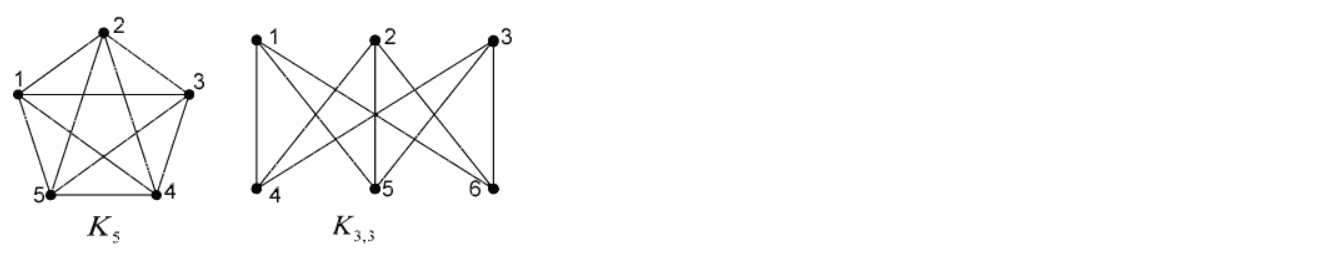

2) Список смежности
  - Для каждой вершины храним соседние (для каждой вершины степень - длина списка):
   - A [B, D]
   - B [A, C, F]
   - и т.д
   - Преимущества: экономно по памяти для разреженных графов (O(V+E)), удобно для обхода графа
   - Недостатки: медленнее проверка наличия ребра между двумя вершинами (O(степень вершины))
     
3) Список ребер
   - Хранится список всех рёбер, каждое из которых задаётся парой (или тройкой для взвешенного графа) вершин.
   - Преимущества: простота реализации, удобно для некоторых задач (например, алгоритмы Краскала).
   - Недостатки: неэффективно для поиска соседей вершины или проверки смежности

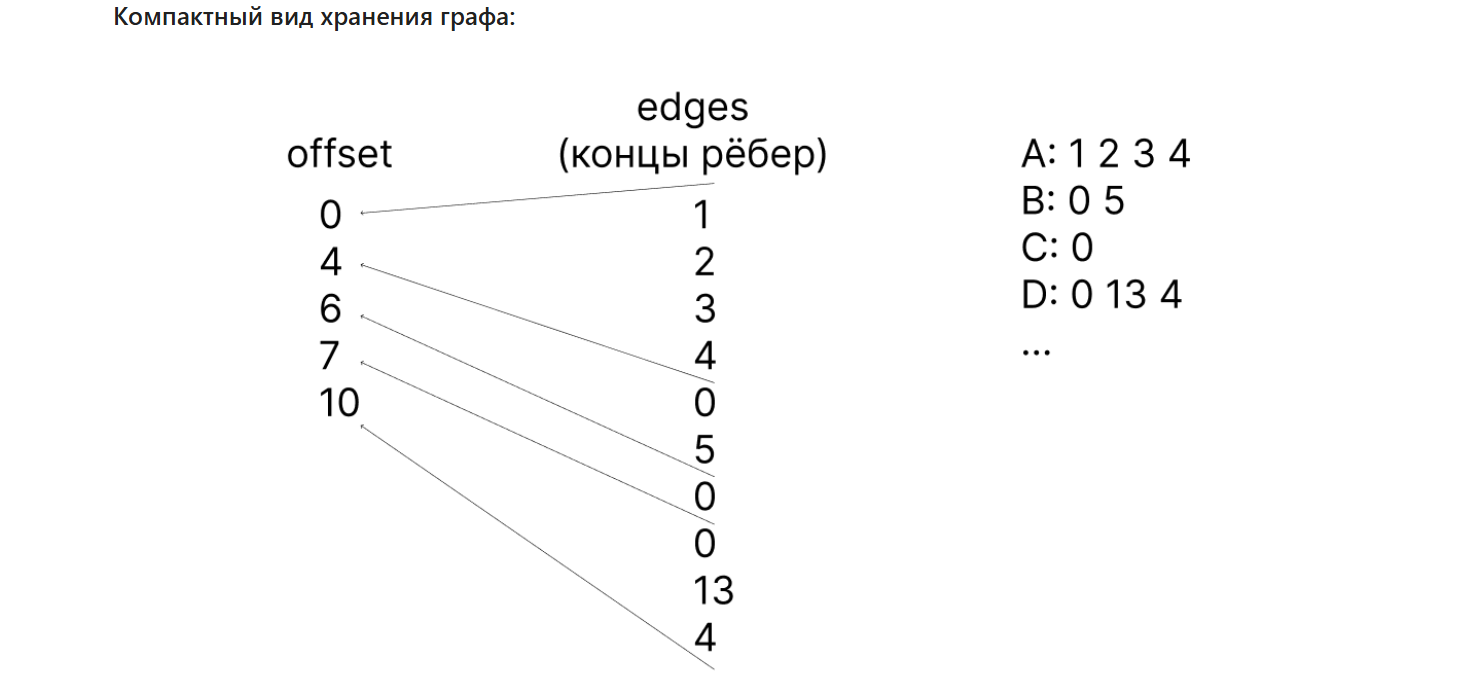

```python
def compact(G:list[list[int]]):
    offset = [0]
    edges = []
    for lst in G:
        for ends in lst:
            edges.append(ends)
        offset.append(len(edges))
    return offset, edges
```
  
```python
def read_graph(orient=True, weight=False):
    G = {}
    N, M = map(int, input().split())
    for _ in range(M):
        if not weight:
            u, v = input().split()
            if u not in G: G[u] = []
            if v not in G: G[v] = []
            G[u].append(v)
            if not orient: G[v].append(u)
        else:
            u, v, w = input().split()
            w = float(w)
            if u not in G: G[u] = {}
            if v not in G: G[v] = {}
            G[u][v] = w
            if not orient: G[v][u] = w

    return G
```

## Обход графа:
- в глубину
```python
def dfs(G, start, used=None):
    if used is None:
        used = set()          # множество посещённых вершин
    used.add(start)           # помечаем текущую вершину как посещённую
    print(f'call {start}.', end=' ')
    for neigh in G[start]:    # проходим по всем соседям вершины start
        if neigh not in used: # если сосед ещё не посещён
            dfs(G, neigh, used)  # рекурсивно вызываем DFS для соседа
    print(f'{start} finish.', end=' ')

```
- в ширину
```python
def BFS(start_node, adj_list, visited_set=None):
    if visited_set is None:
        visited_set = set()     # множество посещённых вершин
    visited_set.add(start_node)
    queue = [start_node]        # список, имитирующий очередь
    while queue:
        curr_node = queue.pop(0)                    # # Удаляем первый элемент
                                          #если тут убрать 0 и оставить просто pop(), то bfs превратится в dfs
        for adj_node in adj_list[curr_node]:
            if adj_node not in visited_set:
                visited_set.add(adj_node)
                BFS(adj_node, adj_list, visited_set)    # # Добавляем в конец очереди
                queue.append(adj_node)
    return visited_set
```

### Для выделения компонент связности в неориентированном графе с помощью обхода в глубину (DFS) на Python можно использовать следующий подход:

```python
def find_connected_components(graph):
    visited = [False] * len(graph)
    components = []
    
    def dfs(node, component):
        if not visited[node]:
            visited[node] = True
            component.append(node)
            for neighbor in graph[node]:
                dfs(neighbor, component)
        return component
    
    for node in range(len(graph)):
        if not visited[node]:
            components.append(dfs(node, []))
    
    return components
```

### Ключевые элементы реализации:
1. **Представление графа**:
   - Используется список смежности, где `graph[i]` содержит соседей вершины `i`
   - Для неориентированного графа рёбра добавляются в обе стороны

2. **Алгоритм DFS**:
   - Рекурсивный обход всех смежных вершин
   - Помечает посещённые вершины в массиве `visited`
   - Собирает вершины компоненты в список `component`

3. **Основной цикл**:
   - Проверяет все вершины графа
   - Для каждой непосещённой вершины запускает DFS
   - Добавляет найденные компоненты в итоговый список

**Подсчёт количества компонент**:
```python
def count_components(graph):
    visited = [False] * len(graph)
    count = 0
    
    def dfs(node):
        if not visited[node]:
            visited[node] = True
            for neighbor in graph[node]:
                dfs(neighbor)
    
    for node in range(len(graph)):
        if not visited[node]:
            count += 1
            dfs(node)
    
    return count
```

### Особенности реализации
- **Рекурсивный подход** наиболее лаконичен, но для очень больших графов может вызвать переполнение стека
- **Временная сложность**: O(V + E) для V вершин и E рёбер
- **Память**: O(V) для хранения посещённых вершин

---

### Вот пример кода на Python для проверки двудольности неориентированного графа с помощью обхода в глубину (DFS):
**Двудольный граф** - это граф, вершины которого можно разбить на два непересекающихся множества (называемые долями) так, что каждое ребро соединяет вершину из одной доли с вершиной из другой доли, а рёбра между вершинами внутри одной доли отсутствуют
```python
def is_bipartite(graph):
    n = len(graph)
    color = [0] * n  # 0 - не окрашена, 1 и -1 - два цвета
    is_bipartite_flag = True

    def dfs(u):
        nonlocal is_bipartite_flag
        for v in graph[u]:
            if color[v] == 0:
                color[v] = -color[u]  # красим соседей в противоположный цвет
                dfs(v)
            elif color[v] == color[u]:
                # Найдена вершина с таким же цветом у соседей - граф не двудольный
                is_bipartite_flag = False

    for i in range(n):
        if color[i] == 0:
            color[i] = 1
            dfs(i)

    return is_bipartite_flag, color
```

### Как работает код:
- `color` - массив для хранения цвета каждой вершины (0 - не окрашена).
- Запускается DFS из каждой неокрашенной вершины.
- При обходе соседей вершина красится в противоположный цвет.
- Если обнаруживается ребро, соединяющее вершины одного цвета, граф не двудольный.
- Возвращается булево значение и раскраска вершин (если граф двудольный).

Этот алгоритм работает за время $O(V + E)$, где $V$ - число вершин, $E$ - число рёбер.

---

### Проверка графа на ацикличность или нахождение цикла обходом в глубину.
```python
def find_cycle(graph):
    n = len(graph)
    color = [0] * n  # 0 - не посещена, 1 - в стеке (серый), 2 - обработана (чёрный)
    parent = [-1] * n
    cycle_start = -1

    def dfs(v):
        nonlocal cycle_start
        color[v] = 1  # серый
        for u in graph[v]:
            if color[u] == 0:
                parent[u] = v
                if dfs(u):
                    return True
            elif color[u] == 1:
                cycle_start = u
                parent[v] = u
                return True
        color[v] = 2  # чёрный
        return False

    for v in range(n):
        if color[v] == 0 and dfs(v):
            break

    if cycle_start == -1:
        print("Граф ацикличен")
        return None
    else:
        cycle = []
        v = cycle_start
        while True:
            cycle.append(v)
            v = parent[v]
            if v == cycle_start and len(cycle) > 1:
                break
        cycle.reverse()
        print("Найден цикл:", cycle)
        return cycle
```
Кратко объяснение:
- Используем DFS с раскраской вершин в три цвета (0,1,2).
- Если во время обхода встречаем вершину с цветом 1 (серый), значит найден цикл.
- Массив `parent` помогает восстановить путь цикла.
- Если цикл не найден, граф ацикличен.

Временная сложность: O(V + E).

---

### Алгоритм Косарайю выделения компонент сильной связности орграфа.
```python
def kosaraju(graph):
    n = len(graph)
    visited = [False] * n
    order = []

    # Шаг 1: первый DFS для заполнения порядка по времени выхода
    def dfs1(v):
        visited[v] = True
        for u in graph[v]:
            if not visited[u]:
                dfs1(u)
        order.append(v)

    for i in range(n):
        if not visited[i]:
            dfs1(i)

    # Шаг 2: транспонирование графа
    transposed = [[] for _ in range(n)]
    for v in range(n):
        for u in graph[v]:
            transposed[u].append(v)

    # Шаг 3: второй DFS по вершинам в порядке убывания времени выхода
    visited = [False] * n
    components = []

    def dfs2(v, comp):
        visited[v] = True
        comp.append(v)
        for u in transposed[v]:
            if not visited[u]:
                dfs2(u, comp)

    for v in reversed(order):
        if not visited[v]:
            comp = []
            dfs2(v, comp)
            components.append(comp)

    return components
```

### Кратко о алгоритме Косарайю:
1. Выполнить DFS на исходном графе, запомнить порядок вершин по времени выхода.
2. Транспонировать граф (развернуть все рёбра).
3. Выполнить DFS на транспонированном графе в порядке убывания времени выхода из первого DFS.
4. Каждое дерево обхода во втором DFS - компонента сильной связности.

Сложность: $$O(V + E)$$.

---

### Выделение компонент связности обходом в ширину.
```python
from collections import deque

def connected_components_bfs(graph):
    visited = set()
    components = []

    for start in graph:
        if start not in visited:
            queue = deque([start])
            component = []
            visited.add(start)

            while queue:
                vertex = queue.popleft()
                component.append(vertex)
                for neighbor in graph[vertex]:
                    if neighbor not in visited:
                        visited.add(neighbor)
                        queue.append(neighbor)
            
            components.append(component)
    
    return components
```
Кратко:
- Обход в ширину (BFS) запускается из каждой непосещённой вершины.
- Все достижимые из неё вершины собираются в компоненту связности.
- Повторяем, пока не пройдём все вершины.
- Используется очередь для обхода соседей по уровням.
- В итоге получаем список компонент связности.

---

### Нахождение кратчайшего цикла в невзвешенном графе.
```python
from collections import deque

def shortest_cycle(graph):
    n = len(graph)
    min_cycle = float('inf')

    for start in range(n):
        dist = [-1] * n
        parent = [-1] * n
        dist[start] = 0
        queue = deque([start])

        while queue:
            v = queue.popleft()
            for u in graph[v]:
                if dist[u] == -1:
                    dist[u] = dist[v] + 1
                    parent[u] = v
                    queue.append(u)
                elif parent[v] != u and parent[u] != v:
                    # Найден цикл: длина = dist[v] + dist[u] + 1
                    cycle_len = dist[v] + dist[u] + 1
                    if cycle_len < min_cycle:
                        min_cycle = cycle_len

    return min_cycle if min_cycle != float('inf') else None
```
Кратко:
- Запускаем BFS из каждой вершины.
- Храним расстояния и родителей.
- Если во время обхода встречаем уже посещённую вершину, не являющуюся родителем, значит найден цикл.
- Вычисляем длину цикла и обновляем минимальную.
- Возвращаем длину кратчайшего цикла или `None`, если циклов нет.

Сложность: $$O(V \times (V + E))$$.

---

### Алгоритм Дейкстры (наивная реализация).
Алгоритм Дейкстры - это жадный алгоритм для поиска кратчайших путей от одной заданной вершины до всех остальных в взвешенном графе с неотрицательными весами рёбер. Он последовательно выбирает непосещённую вершину с минимальным текущим расстоянием, обновляет расстояния до её соседей (релаксация) и повторяет, пока все достижимые вершины не будут обработаны
- поиск кратчайшего пути
- в графе только положительные веса
- может быть и ориентированный, и неориентированный граф
- для начальной точки ставим расстояние 0, для остальных +inf
- далее идем по соседям и если расстояние меньше, то записываем его (создавая кучу)
```python
# наивная реалиизация
def dijkstra_naive(graph, start):
    n = len(graph)
    visited = [False] * n
    dist = [float('inf')] * n
    dist[start] = 0

    for _ in range(n):
        # Выбираем непосещённую вершину с минимальным расстоянием
        u = -1
        min_dist = float('inf')
        for i in range(n):
            if not visited[i] and dist[i] < min_dist:
                min_dist = dist[i]
                u = i
        if u == -1:
            break
        visited[u] = True

        # Обновляем расстояния до соседей
        for v, weight in graph[u]:
            if not visited[v] and dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight

    return dist


# через кучу
def deykstra(G, start):
    h = []
    heapq.heappush(h, (0, start))
    dist = {v: float('+inf') for v in G}
    dist[start] = 0
    used = set()
    while len(h):
        w, v = heapq.heappop(h)
        if v in used:
            continue
        for neigh in G[v]:
            if w + G[v][neigh] < dist[neigh]:
                dist[neigh] = w + G[v][neigh]
                heapq.heappush(h, (dist[neigh], neigh))
        used.add(v)
    return dist
```

### Алгоритм Флойда-Уоршелла.
Алгоритм Флойда-Уоршелла - это алгоритм динамического программирования для поиска кратчайших путей между всеми парами вершин во взвешенном графе (с положительными или отрицательными весами, но без отрицательных циклов).

Идея: для каждой пары вершин проверяется, можно ли улучшить путь, проходящий через промежуточные вершины с номерами до k. Итеративно обновляются расстояния, учитывая всё больше промежуточных вершин.
```python
def floyd_warshall(graph):
    n = len(graph)
    dist = [row[:] for row in graph]  # копия матрицы весов

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist
```
Кратко:
- Работает за $O(n^3)$, где $n$ - число вершин.
- Позволяет найти кратчайшие расстояния между всеми парами вершин.
- Обнаруживает отрицательные циклы, если на диагонали матрицы расстояний появляются отрицательные значения.
  
---

### Алгоритм Форда-Беллмана.
Алгоритм Форда-Беллмана - это алгоритм поиска кратчайших путей от одной вершины до всех остальных во взвешенном ориентированном графе, который может содержать рёбра с отрицательными весами. Он также позволяет обнаружить наличие циклов отрицательного веса, достижимых из стартовой вершины.

Кратко о работе алгоритма:
- Инициализируем расстояния до всех вершин как бесконечность, расстояние до стартовой вершины - 0.
- Повторяем релаксацию всех рёбер графа **|V|-1** раз, где |V| - число вершин.
- Релаксация - попытка улучшить расстояние до вершины через ребро.
- После этого, если возможно улучшить расстояние ещё раз, значит в графе есть отрицательный цикл.
```python
def bellman_ford(edges, n, start):
    INF = float('inf')
    dist = [INF] * n
    dist[start] = 0

    for _ in range(n - 1):
        updated = False
        for u, v, w in edges:
            if dist[u] != INF and dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                updated = True
        if not updated:
            break

    # Проверка на отрицательный цикл
    for u, v, w in edges:
        if dist[u] != INF and dist[u] + w < dist[v]:
            return None  # Отрицательный цикл найден

    return dist
```
Итог:
- Сложность: $O(|V||E|)$
- Работает с отрицательными весами рёбер.
- Позволяет обнаружить отрицательные циклы.
- Используется в задачах с графами, где веса могут быть отрицательными.

---

### Остовные деревья. Алгоритм Прима.
**Остовное дерево** - это связный ациклический подграф исходного связного неориентированного графа, включающий все его вершины[1][2]. Минимальное остовное дерево - это остовное дерево с минимальной суммарной массой рёбер[3].

**Алгоритм Прима** строит минимальное остовное дерево, начиная с произвольной вершины и постепенно добавляя минимально весовое ребро, которое соединяет уже построенное дерево с новой вершиной.
```python
def prim(graph):
    n = len(graph)
    selected = [False] * n
    selected[0] = True
    mst_edges = []
    
    for _ in range(n - 1):
        min_weight = float('inf')
        u = v = -1
        for i in range(n):
            if selected[i]:
                for j, w in graph[i]:
                    if not selected[j] and w < min_weight:
                        min_weight = w
                        u, v = i, j
        if v != -1:
            selected[v] = True
            mst_edges.append((u, v, min_weight))
    
    return mst_edges
```
Кратко о работе алгоритма Прима:
- Начинаем с одной вершины, отмечаем её как включённую.
- На каждом шаге выбираем минимальное ребро, которое соединяет уже включённые вершины с ещё не включёнными.
- Добавляем выбранное ребро и вершину в остов.
- Повторяем, пока все вершины не будут включены.

Сложность наивной реализации - примерно $O(V^2)$, где $V$ - число вершин.

---

### Остовные деревья. Алгоритм Краскала. Система непересекающихся множеств для оптимизации алгоритма.
**Алгоритм Краскала** - жадный алгоритм для поиска минимального остовного дерева (МОД) во взвешенном связном неориентированном графе.  

Идея алгоритма Краскала:
- Отсортировать все рёбра графа по возрастанию веса.
- Изначально каждую вершину считать отдельной компонентой связности.
- По возрастанию веса рассматривать рёбра и добавлять ребро в остов, если оно соединяет вершины из разных компонент связности (то есть не образует цикл).
- Для эффективной проверки принадлежности вершин к компонентам связности используется **система непересекающихся множеств (Union-Find)**.
- Алгоритм завершается, когда все вершины объединены в одну компоненту (или рассмотрены все рёбра).

```python
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, u):
        while u != self.parent[u]:
            self.parent[u] = self.parent[self.parent[u]]  # сжатие пути
            u = self.parent[u]
        return u

    def union(self, u, v):
        ru, rv = self.find(u), self.find(v)
        if ru == rv:
            return False  # уже в одной компоненте
        if self.rank[ru] < self.rank[rv]:
            self.parent[ru] = rv
        else:
            self.parent[rv] = ru
            if self.rank[ru] == self.rank[rv]:
                self.rank[ru] += 1
        return True

def kruskal(n, edges):
    edges.sort(key=lambda x: x[2])  # сортируем по весу
    uf = UnionFind(n)
    mst = []
    for u, v, w in edges:
        if uf.union(u, v):
            mst.append((u, v, w))
    return mst
```
**Система непересекающихся множеств (Union-Find):**
- Позволяет эффективно поддерживать разбиение множества вершин на компоненты связности.
- Операции:
  - **find(u)** - найти представителя компоненты, к которой принадлежит вершина u.
  - **union(u, v)** - объединить компоненты, содержащие u и v.
- Используются оптимизации: сжатие пути и ранговое объединение, что обеспечивает амортизированное время почти константное (обратное функции Аккермана).

Итоги:
- Алгоритм Краскала работает за время $O(E \log E)$ из-за сортировки рёбер.
- Union-Find позволяет быстро проверять и объединять компоненты, предотвращая циклы.
- Алгоритм гарантирует построение минимального остовного дерева.

---

### Игры на ациклических графах. Решение поиском в глубину.
В играх, моделируемых на ациклических графах, каждая вершина соответствует состоянию игры, а рёбра - ходам между этими состояниями. Задача - определить, кто выиграет при оптимальной игре обоих игроков, начиная из данной вершины.

Основная идея решения через DFS:

- Разобьём вершины графа на две категории:
  - **Выигрышные (N)** - из них первый игрок может перейти в проигрышную вершину соперника.
  - **Проигрышные (P)** - из них все возможные ходы ведут только в выигрышные вершины соперника.

- При обходе в глубину для вершины `u`:
  - Если существует хотя бы один сосед `v`, который является проигрышной вершиной, то `u` - выигрышная.
  - Иначе `u` - проигрышная.

- Такой подход удобен для ациклических графов, где можно обрабатывать вершины в порядке обратной топологической сортировки.

```python
def game_dfs(u, graph, state):
    if state[u] != 0:
        return state[u]  # 1 - выигрышная, -1 - проигрышная

    for v in graph[u]:
        if game_dfs(v, graph, state) == -1:
            state[u] = 1
            return 1

    state[u] = -1
    return -1

# Пример использования:
# graph - список смежности ацикличного графа
graph = [
    [1, 2],  # 0
    [3],     # 1
    [3],     # 2
    []       # 3
]

state = [0] * len(graph)  # 0 - не вычислено, 1 - выигрышная, -1 - проигрышная

for u in range(len(graph)):
    if state[u] == 0:
        game_dfs(u, graph, state)

print(state)  # Вывод: [1, -1, -1, -1]
```
Итоги:
- В ациклических играх вершины разбиваются на выигрышные и проигрышные.
- DFS позволяет определить статус каждой вершины.
- Выигрышная вершина - если есть ход в проигрышную.
- Проигрышная - если все ходы ведут в выигрышные.
- Такой анализ помогает построить выигрышную стратегию.

---

### Сумма игр. Функция Шпрага-Гранди.
**Сумма игр** - это операция над играми, когда одновременно играют в несколько независимых игр, и на каждом ходе игрок выбирает одну из них, чтобы сделать ход. Формально, если заданы игры $$A$$ и $$B$$ с графами состояний, то сумма $$A + B$$ - игра на декартовом произведении вершин, где ход делается либо в игре $$A$$, либо в игре $$B$$.

### Функция Шпрага-Гранди (Sprague-Grundy)

Для каждой позиции комбинаторной игры на графе определяется число - *значение Шпрага-Гранди* (или *гранди*), которое характеризует позицию с точки зрения выигрыша:

- Для терминальных (без ходов) позиций значение равно 0.
- Для остальных позиций значение равно минимальному невырожденному числу (mex) среди значений всех позиций, достижимых одним ходом.

**Ключевое свойство:** сумма игр соответствует операции XOR значений Шпрага-Гранди отдельных игр.

Что это значит на практике?

- Значение позиции суммы игр - XOR значений Шпрага-Гранди каждой составляющей.
- Позиция выигрышная, если XOR ≠ 0, проигрышная, если XOR = 0.
- Позволяет свести анализ сложных сумм игр к вычислению значений Шпрага-Гранди для простых компонентов.

```python
def mex(s):
    m = 0
    while m in s:
        m += 1
    return m

def sprague_grundy(u, graph, memo):
    if u in memo:
        return memo[u]
    next_values = [sprague_grundy(v, graph, memo) for v in graph[u]]
    g = mex(next_values)
    memo[u] = g
    return g

# Пример графа (список смежности)
graph = {
    0: [1, 2],
    1: [3],
    2: [3],
    3: []
}

memo = {}
grundy_value = sprague_grundy(0, graph, memo)
print("Значение Шпрага-Гранди для вершины 0:", grundy_value)
```
Итог

- **Сумма игр** - игра, где ход делается в одной из нескольких независимых игр.
- **Функция Шпрага-Гранди** присваивает каждой позиции число, отражающее её выигрышность.
- Для суммы игр значение позиции - XOR значений Шпрага-Гранди компонент.
- Это фундаментальный инструмент в теории комбинаторных игр для анализа сложных составных игр.

Основные моменты и алгоритм решения

- Вершины без исходящих рёбер - терминальные, считаются проигрышными (P-вершины).
- Вершина считается выигрышной (N-вершиной), если из неё есть ход в проигрышную вершину.
- Вершина проигрышная, если все её исходящие вершины - выигрышные.
- При наличии циклов возможны ничейные позиции - игра может длиться бесконечно.
- Для определения статусов всех вершин используется **ретро-анализ**:
  - Изначально помечаем терминальные вершины как проигрышные.
  - Итеративно обновляем статусы вершин по правилам выше.
  - Повторяем, пока не перестанут происходить изменения.
- Алгоритм работает за время $$O(V + E)$$, где $$V$$ - число вершин, $$E$$ - число рёбер.

```python
from collections import deque

def analyze_game(graph):
    n = len(graph)
    out_degree = [len(graph[u]) for u in range(n)]
    status = [None] * n  # None - не определено, True - выигрышная, False - проигрышная
    queue = deque()

    # Терминальные вершины - проигрышные
    for u in range(n):
        if out_degree[u] == 0:
            status[u] = False
            queue.append(u)

    while queue:
        u = queue.popleft()
        for v in reverse_graph[u]:  # reverse_graph - граф с рёбрами в обратную сторону
            if status[v] is None:
                if status[u] == False:
                    status[v] = True
                    queue.append(v)
                else:
                    out_degree[v] -= 1
                    if out_degree[v] == 0:
                        status[v] = False
                        queue.append(v)

    return status
```
Итоги

- Игры на произвольных графах обобщают классические комбинаторные игры.
- Анализ выигрыша сводится к классификации вершин на выигрышные, проигрышные и ничейные.
- Ретро-анализ и обходы по графу позволяют эффективно вычислить исход для всех позиций.
- Наличие циклов может приводить к ничьей (бесконечному процессу).

---

### ООП, инкапсуляция, наследование, полиморфизм.

Объектно-ориентированное программирование (ООП) - это подход к программированию, в котором программа рассматривается как набор взаимодействующих объектов, каждый из которых имеет свои свойства (данные) и поведение (методы)[1][2][3].

Основные принципы ООП:

- **Инкапсуляция** - скрытие внутреннего состояния объекта и предоставление доступа к нему только через публичные методы. Это повышает безопасность и снижает вероятность случайных изменений данных.

- **Наследование** - механизм, позволяющий создавать новый класс на основе существующего, наследуя его свойства и методы. Это облегчает повторное использование кода и расширение функционала.

- **Полиморфизм** - способность объектов разных классов реагировать на одинаковые сообщения (вызовы методов) по-разному. Позволяет использовать единый интерфейс для работы с разными типами объектов.

- **Абстракция** - выделение существенных характеристик объекта и скрытие несущественных деталей, что упрощает понимание и использование объектов.

Таким образом, ООП помогает структурировать код, сделать его более читаемым, масштабируемым и управляемым, моделируя реальные объекты и их взаимодействия.

---

### Классы в Python. Магические методы классов.
Классы в Python - это шаблоны для создания объектов, объединяющие данные (атрибуты) и поведение (методы). Магические методы - специальные методы с двойным подчёркиванием `__метод__`, которые позволяют переопределять поведение встроенных операций и функций для объектов класса.

Основные магические методы классов в Python:

- `__init__(self, ...)` - инициализация объекта при создании.
- `__str__(self)` - строковое представление объекта (для `print()` и `str()`).
- `__repr__(self)` - официальное строковое представление (для отладки).
- Арифметические операции:
  - `__add__(self, other)` - сложение (`+`)
  - `__sub__(self, other)` - вычитание (`-`)
  - `__mul__(self, other)` - умножение (`*`)
  - `__truediv__(self, other)` - деление (`/`)
  - и др.
- Операторы сравнения:
  - `__eq__(self, other)` - равно (`==`)
  - `__ne__(self, other)` - не равно (`!=`)
  - `__lt__(self, other)` - меньше (``)
  - `__ge__(self, other)` - больше или равно (`>=`)
- Унарные операции:
  - `__neg__(self)` - отрицание (`-obj`)
  - `__pos__(self)` - унарный плюс (`+obj`)
  - `__abs__(self)` - абсолютное значение (`abs(obj)`)

Магические методы
```python
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)

    def __str__(self):
        return f'Vector({self.x}, {self.y})'

v1 = Vector(1, 2)
v2 = Vector(3, 4)
print(v1 + v2)  # Выведет: Vector(4, 6)
```
Магические методы позволяют объектам классов вести себя как встроенные типы Python, переопределяя операции и функции. Это делает классы гибкими и удобными для использования.

---

### Абстрактные классы, модуль abc.
Абстрактные классы в Python - это классы, которые не могут быть созданы напрямую и содержат один или несколько абстрактных методов - методов без реализации, которые обязаны реализовать все подклассы. Для работы с абстрактными классами используется модуль **`abc`**.

Основные моменты:

- Абстрактный класс создаётся путём наследования от `abc.ABC`.
- Абстрактные методы помечаются декоратором `@abstractmethod`.
- Если класс содержит хотя бы один абстрактный метод, то его нельзя инстанцировать.
- Все подклассы должны реализовать все абстрактные методы, иначе они тоже считаются абстрактными.
- Модуль `abc` также поддерживает абстрактные свойства, методы класса и статические методы.

```python
from abc import ABC, abstractmethod

class Shape(ABC):
    @abstractmethod
    def area(self):
        pass

class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return 3.14 * self.radius ** 2

# Нельзя создать экземпляр Shape:
# s = Shape()  # Ошибка: TypeError

c = Circle(5)
print(c.area())  # Выведет площадь круга
```
Зачем использовать абстрактные классы?

- Определяют общий интерфейс для группы классов.
- Обеспечивают обязательную реализацию ключевых методов в подклассах.
- Улучшают читаемость и поддержку кода за счёт явного указания обязательных методов.
- Используются для создания каркаса (шаблона) архитектуры программы.

Дополнительно

- В стандартной библиотеке Python есть готовые абстрактные классы в модуле `collections.abc` (например, `Iterable`, `Sequence`).
- Можно создавать абстрактные свойства с помощью `@property` и `@abstractmethod`.
- Абстрактные классы поддерживают множественное наследование, но с осторожностью из-за возможных конфликтов метаклассов.

Таким образом, модуль `abc` - это стандартный и удобный инструмент для определения абстрактных базовых классов и методов в Python, обеспечивающий строгую структуру и интерфейсы в объектно-ориентированном программировании.

---

### Генераторы и сопроцессы
Генераторы и сопроцессы - это разные концепции, но обе связаны с управлением выполнением и эффективной обработкой данных.

Генераторы в Python (map, range, zip, enumirate)

- **Генератор** - это функция, которая вместо одного значения возвращает последовательность значений по одному за раз, используя ключевое слово `yield`.
- При вызове генераторной функции она не выполняется сразу, а возвращает объект-генератор, который можно итерировать.
- Генераторы экономят память, поскольку значения вычисляются по мере необходимости (ленивые вычисления).
- Создать генератор можно двумя способами:
  - Функция с `yield`.
  - Генераторное выражение - компактный синтаксис, похожий на списковое включение, но с круглыми скобками.

### Пример генератора:

```python
def count_up_to(max):
    for i in range(1, max + 1):
        yield i

for number in count_up_to(5):
    print(number)

# генератор range

def range(start, stop=None, step=1):
    if stop is None:
        stop = start
        start = 0
    if step == 0:
        raise ValueError
    if step > 0:
        i = start
        while i < stop:
            yield i
            i += step
    else:
        i = start
        while i > stop:
            yield i
            i += step

# генератор enumerate

def enumerate(Iterable, start=0):
    index = start
    for item in Iterable:
        yield index, item
        index += 1

# генератор zip

def zip(*iterables):
    iterators = [iter(it) for it in iterables]
    while True:
        items = []
        for it in iterators:
            try:
                items.append(next(it))
            except StopIteration:
                return
        yield tuple(items)
```

## Сопроцессы (корутины)

- **Сопроцесс (корутина)** - расширение идеи генераторов, позволяющее не только выдавать значения, но и принимать данные извне, а также приостанавливать и возобновлять выполнение.
- В Python корутины реализуются с помощью `async def` и `await` (асинхронное программирование) или с помощью генераторов и метода `send()`.
- Сопроцессы полезны для конкурентного выполнения задач, обработки событий, асинхронного ввода-вывода.

Кратко о различиях

| Особенность       | Генератор                          | Сопроцесс (корутина)                  |
|-------------------|----------------------------------|--------------------------------------|
| Возвращает значения| Да, с помощью `yield`             | Да, может принимать и возвращать данные |
| Управление        | Однонаправленное (выдаёт значения) | Двунаправленное (принимает и отдаёт) |
| Использование     | Итерация, ленивые вычисления     | Асинхронность, конкурентность        |

Итог

- Генераторы - удобный инструмент для создания итераторов с ленивыми вычислениями.
- Сопроцессы (корутины) - расширение генераторов для более гибкого управления выполнением и обменом данными.
- В Python генераторы создаются с `yield`, корутины - с `async/await` или с использованием генераторов и `send()`.

---

### Декораторы
Декораторы в Python - это функции высшего порядка, которые принимают другую функцию (или метод) и возвращают новую функцию, расширяющую или изменяющую поведение исходной, при этом сам код исходной функции не меняется[1][2][3].

Как работают декораторы

- Декоратор - это функция, принимающая функцию и возвращающая функцию-обёртку.
- Обёртка выполняет дополнительный код до и/или после вызова исходной функции.
- Используется синтаксис `@decorator` над определением функции для удобства применения.

```python
def decorator_function(func):
    def wrapper():
        print('Перед вызовом функции')
        func()
        print('После вызова функции')
    return wrapper

@decorator_function
def say_hello():
    print('Привет!')

say_hello()

# декоратор swap , который меняет порядок первого и второго параметров

def swap(func):
    def wrapper(x, y, *args, **kwargs):
        return func(y, x, *args, **kwargs)
    return wrapper

# декоратор swap , который меняет (2*i)-ый с (2*i+1)-ым порядковым параметром, если это возможно. Именованые параметры остаються как были

def swap(func):
    def wrapper(*args, **kwargs):
        args = list(args)
        # Меняем местами пары (0,1), (2,3), (4,5) и т.д.
        for i in range(0, len(args) - 1, 2):
            args[i], args[i+1] = args[i+1], args[i]
        return func(*args, **kwargs)
    return wrapper

# декоратор debug(form) , который выводит всю информацию о работе функции. 
# form -- строка формата вывода отладочных данных. 
# form содержит: {args} - кортеж позиционных аргументов, {kwargs} -- словарь именованых параметров, {res} -- результат работы функции

def debug(form):
    def decorator(func):
        def wrapper(*args, **kwargs):
            res = func(*args, **kwargs)
            print(form.format(args=args, kwargs=kwargs, res=res))
            return res
        return wrapper
    return decorator
```
Где применяются декораторы

- Логирование вызовов функций
- Кэширование результатов
- Проверка прав доступа
- Измерение времени выполнения
- В веб-фреймворках и тестировании

Итог

Декораторы позволяют удобно и гибко расширять функциональность функций и методов без изменения их исходного кода, делая код чище и более модульным[1][2][3][5].
